**Importing Essential Libraries**

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [ ]:
df_players = pd.read_csv('Players.csv')
df_stats = pd.read_csv('Seasons_Stats.csv')
df_playerdata = pd.read_csv('player_data.csv')

In [ ]:
df_inter = df_stats.merge(df_players,how = 'left', on = 'Player')
df_inter.head()

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,217.0,458.0,0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,99.0,279.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,192.0,438.0,2,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,29.0,63.0,3,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,27.0,59.0,3,196.0,88.0,North Carolina State University,1925.0,NaN,NaN


In [ ]:
df_inter['Age']= df_inter['Year']- df_inter['born']
df_inter.head()

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
0,0,1950.0,Curly Armstrong,G-F,32.0,FTW,63.0,NaN,NaN,NaN,...,NaN,217.0,458.0,0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,99.0,279.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,1950.0,Leo Barnhorst,SF,26.0,CHS,67.0,NaN,NaN,NaN,...,NaN,192.0,438.0,2,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,1950.0,Ed Bartels,F,25.0,TOT,15.0,NaN,NaN,NaN,...,NaN,29.0,63.0,3,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,1950.0,Ed Bartels,F,25.0,DNN,13.0,NaN,NaN,NaN,...,NaN,27.0,59.0,3,196.0,88.0,North Carolina State University,1925.0,NaN,NaN


In [ ]:
df_inter.columns.unique()

Index(['Unnamed: 0_x', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Unnamed: 0_y', 'height',
       'weight', 'collage', 'born', 'birth_city', 'birth_state'],
      dtype='object')

CREATING NEW FEATURES

In [ ]:
features = ['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
#features = ['Year','Player','Tm', 'PTS']
ssn_stats = df_stats[features].dropna()

players = 0
season_nystats = {} # (Year, Player, Tm) : (NYPTS, NYTRB, NYAST, NYBLK, NYSTL, NYTOV)
nyfeatures = ['NYPTS', 'NYTRB', 'NYAST', 'NYBLK', 'NYSTL', 'NYTOV', 'NYFPS']
teams = set([])
print(len(ssn_stats))
for i in range(len(ssn_stats)):
    row = ssn_stats[['Year','Player','Tm', 'PTS', 'TRB', 'AST', 'BLK', 'STL', 'TOV']].iloc[i]
    season_nystats[(int(row['Year']) - 1,
                  row['Player'],
                  row['Tm'])] = (row['PTS'],
                                 row['TRB'],
                                 row['AST'],
                                 row['BLK'],
                                 row['STL'],
                                 row['TOV'],
                                 row['PTS'] + row['TRB']*1.2 + row['AST']*1.5 + row['BLK']*2 + row['STL']*2 + row['TOV']*(-1))
    teams.add(row['Tm'])

14585


In [ ]:
ssn_stats.loc[ssn_stats.Year == 2015]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22865,2015.0,Quincy Acy,PF,24.0,NYK,68.0,22.0,1287.0,11.9,0.533,...,0.784,79.0,222.0,301.0,68.0,27.0,22.0,60.0,147.0,398.0
22866,2015.0,Jordan Adams,SG,20.0,MEM,30.0,0.0,248.0,12.8,0.489,...,0.609,9.0,19.0,28.0,16.0,16.0,7.0,14.0,24.0,94.0
22867,2015.0,Steven Adams,C,21.0,OKC,70.0,67.0,1771.0,14.1,0.549,...,0.502,199.0,324.0,523.0,66.0,38.0,86.0,99.0,222.0,537.0
22869,2015.0,Arron Afflalo,SG,29.0,TOT,78.0,72.0,2502.0,10.7,0.533,...,0.843,27.0,220.0,247.0,129.0,41.0,7.0,116.0,167.0,1035.0
22870,2015.0,Arron Afflalo,SG,29.0,DEN,53.0,53.0,1750.0,11.7,0.533,...,0.841,21.0,159.0,180.0,101.0,32.0,5.0,83.0,108.0,771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23510,2015.0,Nick Young,SG,29.0,LAL,42.0,0.0,1000.0,14.2,0.520,...,0.892,17.0,79.0,96.0,41.0,23.0,11.0,44.0,83.0,563.0
23511,2015.0,Thaddeus Young,PF,26.0,TOT,76.0,68.0,2434.0,15.7,0.507,...,0.655,127.0,284.0,411.0,173.0,124.0,25.0,117.0,171.0,1071.0
23512,2015.0,Thaddeus Young,PF,26.0,MIN,48.0,48.0,1605.0,15.0,0.491,...,0.682,75.0,170.0,245.0,135.0,86.0,17.0,75.0,115.0,685.0
23513,2015.0,Thaddeus Young,PF,26.0,BRK,28.0,20.0,829.0,17.1,0.539,...,0.606,52.0,114.0,166.0,38.0,38.0,8.0,42.0,56.0,386.0


**Data Visualization Career Points**

>*Most career points players

In [ ]:
PlayerPoints = df_inter[['Player','PTS']].groupby('Player').sum().sort_values('PTS', ascending = False).head(20)

In [ ]:
trace1 = go.Bar(
    x = PlayerPoints.index.tolist(),
    y = PlayerPoints["PTS"].tolist(),
    name='Career Points',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

layout = go.Layout(
    barmode='stack',
    title = 'NBA Highest Scorers',
    titlefont=dict(size=25),
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Career Points',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Player Names'),
    yaxis2=dict(
        title='Value [M€]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 20
    ),
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data= [trace1], layout=layout)
py.iplot(fig, show_link=False)

>**Correlation between various factors and points scored in 2016-2017 season**

In [ ]:
df_2017 = df_inter[df_inter['Year'] == 2017]
df_2017.head()

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
24096,24096,2017.0,Alex Abrines,SG,24.0,OKC,68.0,6.0,1055.0,10.1,...,33.0,114.0,406.0,3833,198.0,86.0,NaN,1993.0,Palma de Mallorca,Spain
24097,24097,2017.0,Quincy Acy,PF,27.0,TOT,38.0,1.0,558.0,11.8,...,21.0,67.0,222.0,3531,201.0,108.0,Baylor University,1990.0,Tyler,Texas
24098,24098,2017.0,Quincy Acy,PF,27.0,DAL,6.0,0.0,48.0,-1.4,...,2.0,9.0,13.0,3531,201.0,108.0,Baylor University,1990.0,Tyler,Texas
24099,24099,2017.0,Quincy Acy,PF,27.0,BRK,32.0,1.0,510.0,13.1,...,19.0,58.0,209.0,3531,201.0,108.0,Baylor University,1990.0,Tyler,Texas
24100,24100,2017.0,Steven Adams,C,24.0,OKC,80.0,80.0,2389.0,16.5,...,146.0,195.0,905.0,3607,213.0,115.0,University of Pittsburgh,1993.0,Rotorua,New Zealand


>**Plotting density distribution of key dimensions**

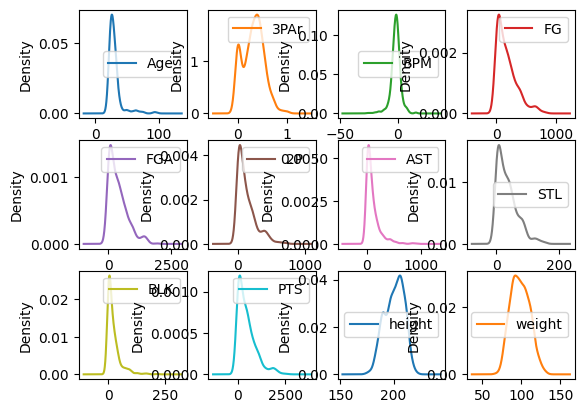

In [ ]:
data = df_2017[['Age',  '3PAr',
        'BPM', 'FG', 'FGA',
       '2P', 
       'AST', 'STL', 'BLK', 'PTS', 'height',
       'weight']]

data.plot(kind='density',layout = (3,4), subplots=True, sharex=False)
plt.show()

>**Correlation Matrix Plot to find high level correlations between player's age, height & weight against box score items such as BLK %, PTS etc.**

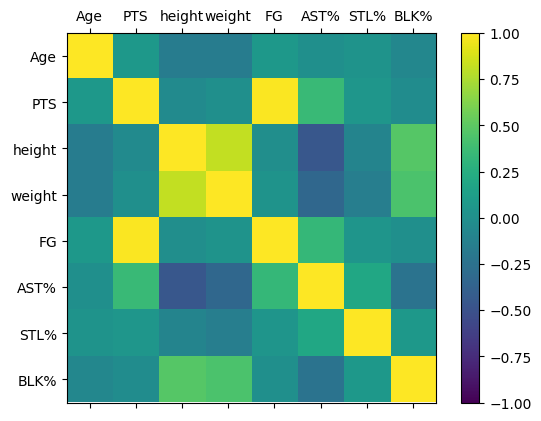

In [ ]:
names = ['Age',  'PTS',  'height', 'weight', 'FG','AST%', 'STL%',
       'BLK%']

data2 = df_2017[names]

correlations = data2.corr()
# plot correlation matrix

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

***Takeaways:***
1.  Correlation Matrix

> There is some negative correlation between Age & Points, it is not as significant as would have been expected given that it's a competive sport with relatively short time frame for prime age players.

> Strong negative correlation between height and assist % -- Probably because they are on the receiving end of the assist.

> There is some positive correlation between height & weight with block %.

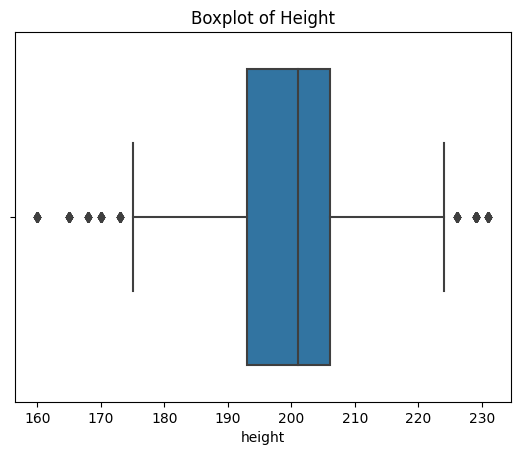

In [ ]:
hx = sns.boxplot(data=df_inter, x="height").set_title("Boxplot of Height")

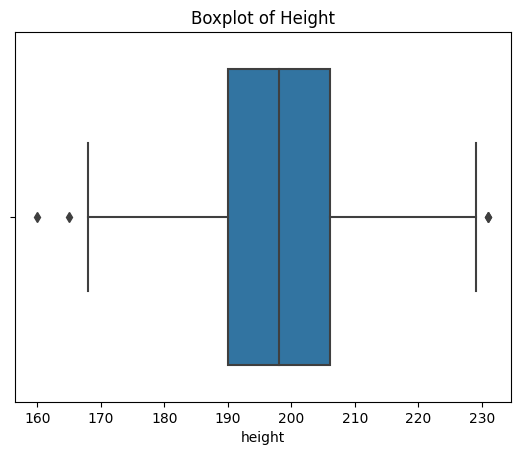

In [ ]:
hx = sns.boxplot(data=df_players, x="height").set_title("Boxplot of Height")

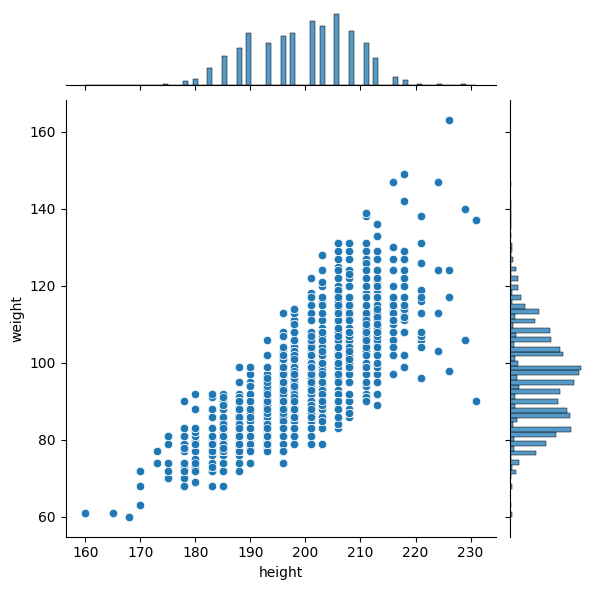

In [ ]:
sns.jointplot(x="height", y="weight", data=df_inter, kind="scatter");

<ipython-input-41-8cd0b80d3b62>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




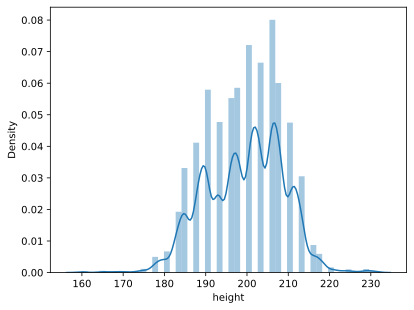

In [ ]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df_inter["height"]);

<ipython-input-42-1de358f8345d>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




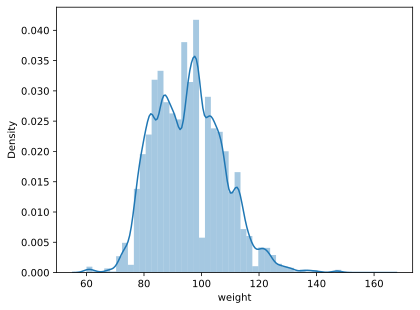

In [ ]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df_inter["weight"]);

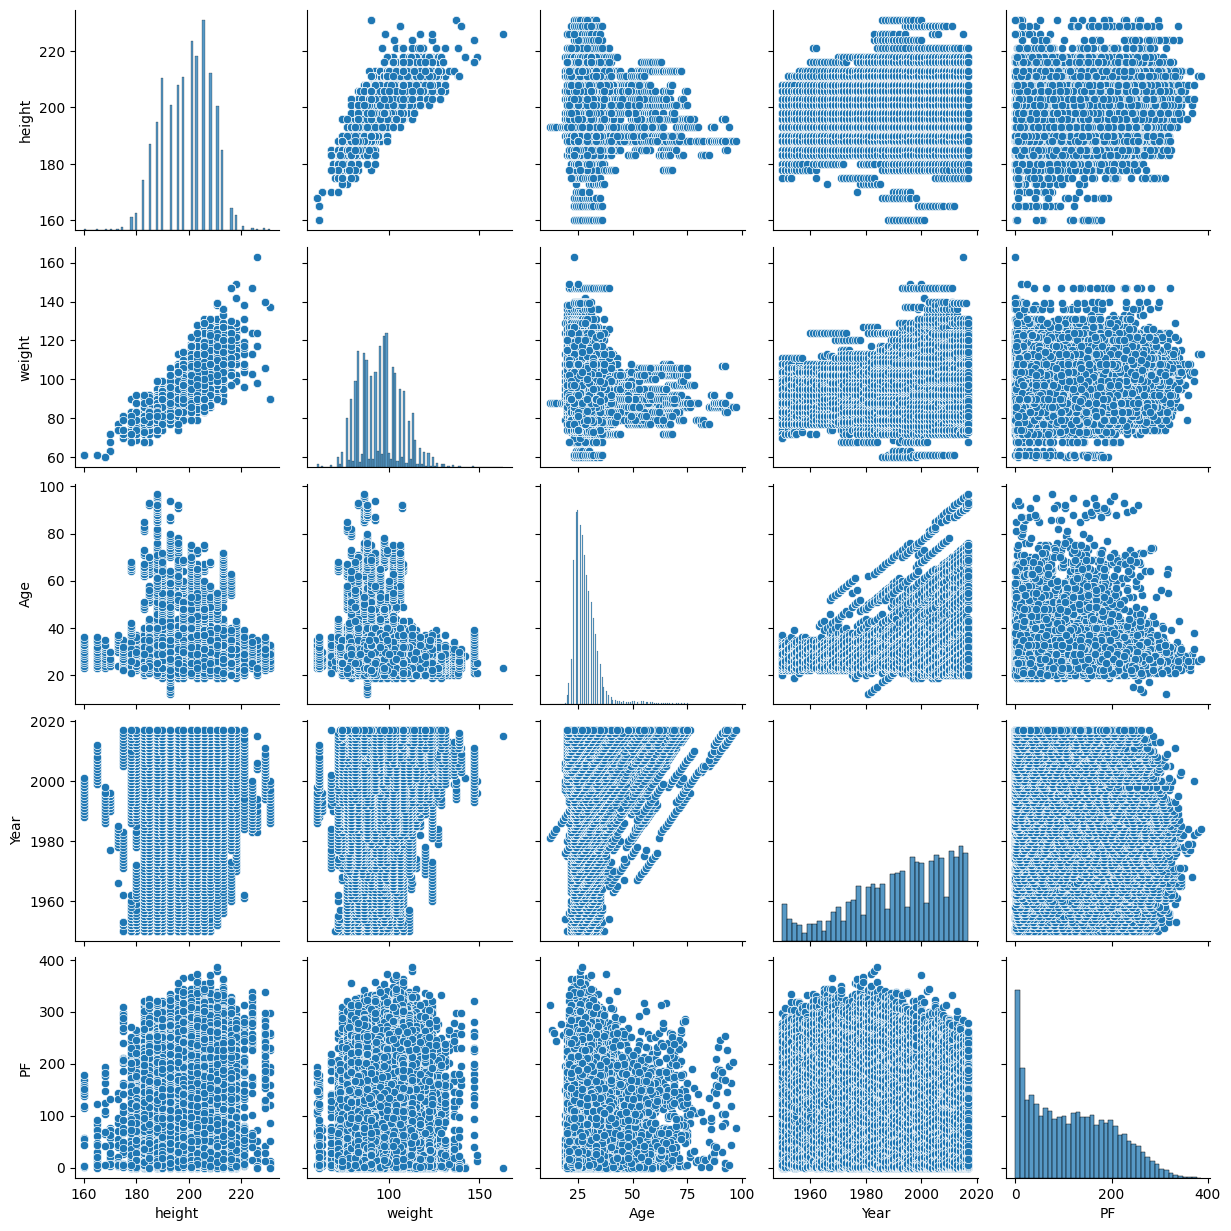

In [ ]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df_inter[["height", "weight", "Age", "Year", "PF"]]
);